In [42]:
#install.packages("BatchGetSymbols")


In [163]:
library(ggplot2)
library(scales)
library(BatchGetSymbols)
library(lubridate)
library(tidyr)
library(forecast)


In [38]:
petr = BatchGetSymbols('PETR4.SA', first.date = as.Date('2010-01-01'),
last.date = as.Date('2020-12-31'))


Running BatchGetSymbols for:

   tickers =PETR4.SA


^GSPC | yahoo (1|1)
 | Found cache file

PETR4.SA | yahoo (1|1)
 | Found cache file
 - Got 96.0% of valid prices | Mas bah tche, que coisa linda!


In [223]:
petr

$df.control
# A tibble: 1 x 6
  ticker   src   download.status total.obs perc.benchmark.dat~ threshold.decisi~
  <chr>    <chr> <chr>               <int>               <dbl> <chr>            
1 PETR4.SA yahoo OK                   2725               0.960 KEEP             

$df.tickers
     price.open price.high price.low price.close    volume price.adjusted
1        36.950     37.320    36.820      37.320  13303600      28.142263
2        37.380     37.430    36.800      37.000  21396400      27.900969
3        36.800     37.500    36.800      37.500  18720600      28.278000
4        37.270     37.450    37.070      37.150  10964600      28.014072
5        37.160     37.390    36.860      36.950  14624200      27.863256
6        37.210     37.340    36.620      36.830  15317700      27.772762
7        36.590     36.680    36.040      36.360  14886200      27.418350
8        36.560     36.740    35.840      36.300  23228200      27.373104
9        36.280     36.460    35.560      35.670  20073400      26.898029
10       35.570     36.100    35.510      35.750  21169000      26.958361
11       35.900     36.670    35.770      36.550  23168400      27.561623
12       36.450     36.650    36.240      36.380  16895900      27.433432
13       36.100     36.150    35.260      35.450  18757500      26.732134
14       35.580     35.700    34.290      34.330  24553000      25.887569
15       34.110     34.800    34.060      34.750  19025100      26.204281
16       34.290     34.340    33.650      33.900  20281200      25.563309
17       33.900     34.290    33.510      34.110  19908600      25.721666
18       34.600     34.690    33.870      34.610  13819200      26.098709
19       34.780     35.050    33.930      34.170  16106700      25.766909
20       34.290     34.490    33.900      34.300  15869300      25.864941
21       34.510     34.670    34.060      34.100  15289600      25.714125
22       34.050     34.180    33.730      34.040  16091200      25.668890
23       33.840     33.940    32.120      32.300  24280300      24.356781
24       31.800     32.270    30.720      31.520  29033800      23.768597
25       31.800     32.260    31.420      31.740  18684700      23.934494
26       32.200     32.680    32.100      32.240  18104200      24.311537
27       32.330     32.730    31.770      32.640  21909900      24.613171
28       32.890     33.470    32.730      33.360  24110900      25.156109
29       33.000     34.020    32.950      33.800  19127100      25.487902
30       34.390     34.500    34.030      34.250  16622400      25.827238
31       34.240     34.690    33.820      34.690  17017800      26.159033
32       34.420     34.650    34.160      34.350  11889400      25.902645
33       34.500     34.890    34.410      34.650  19817500      26.128874
34       34.410     34.650    34.000      34.190  16937500      25.781996
35       34.290     34.350    33.640      33.940  13563100      25.593473
36       33.480     34.500    33.260      34.380  18650100      25.925270
37       34.590     34.750    34.210      34.610  17804300      26.098709
38       34.820     35.050    34.420      34.930  16959300      26.340014
39       35.250     35.520    35.120      35.120  17108100      26.483288
40       35.280     35.820    35.050      35.150  19957600      26.505913
41       35.390     35.490    34.810      35.200  14068900      26.543613
42       35.690     35.920    35.400      35.810  28235000      27.003601
43       35.940     35.990    35.410      35.700  15902100      26.920660
44       35.500     36.850    35.460      36.500  68696600      27.523922
45       36.880     37.160    36.650      37.000  32196400      27.900969
46       36.930     37.470    36.810      37.050  19449600      27.938665
47       37.200     37.410    37.060      37.060  13940300      27.946201
48       36.760     37.230    36.470      36.770  19839600      27.727516
49       36.930     37.210    36.700      37.210  12807500      28.059320
50       37.43

In [224]:
class(petr)

[1] "list"

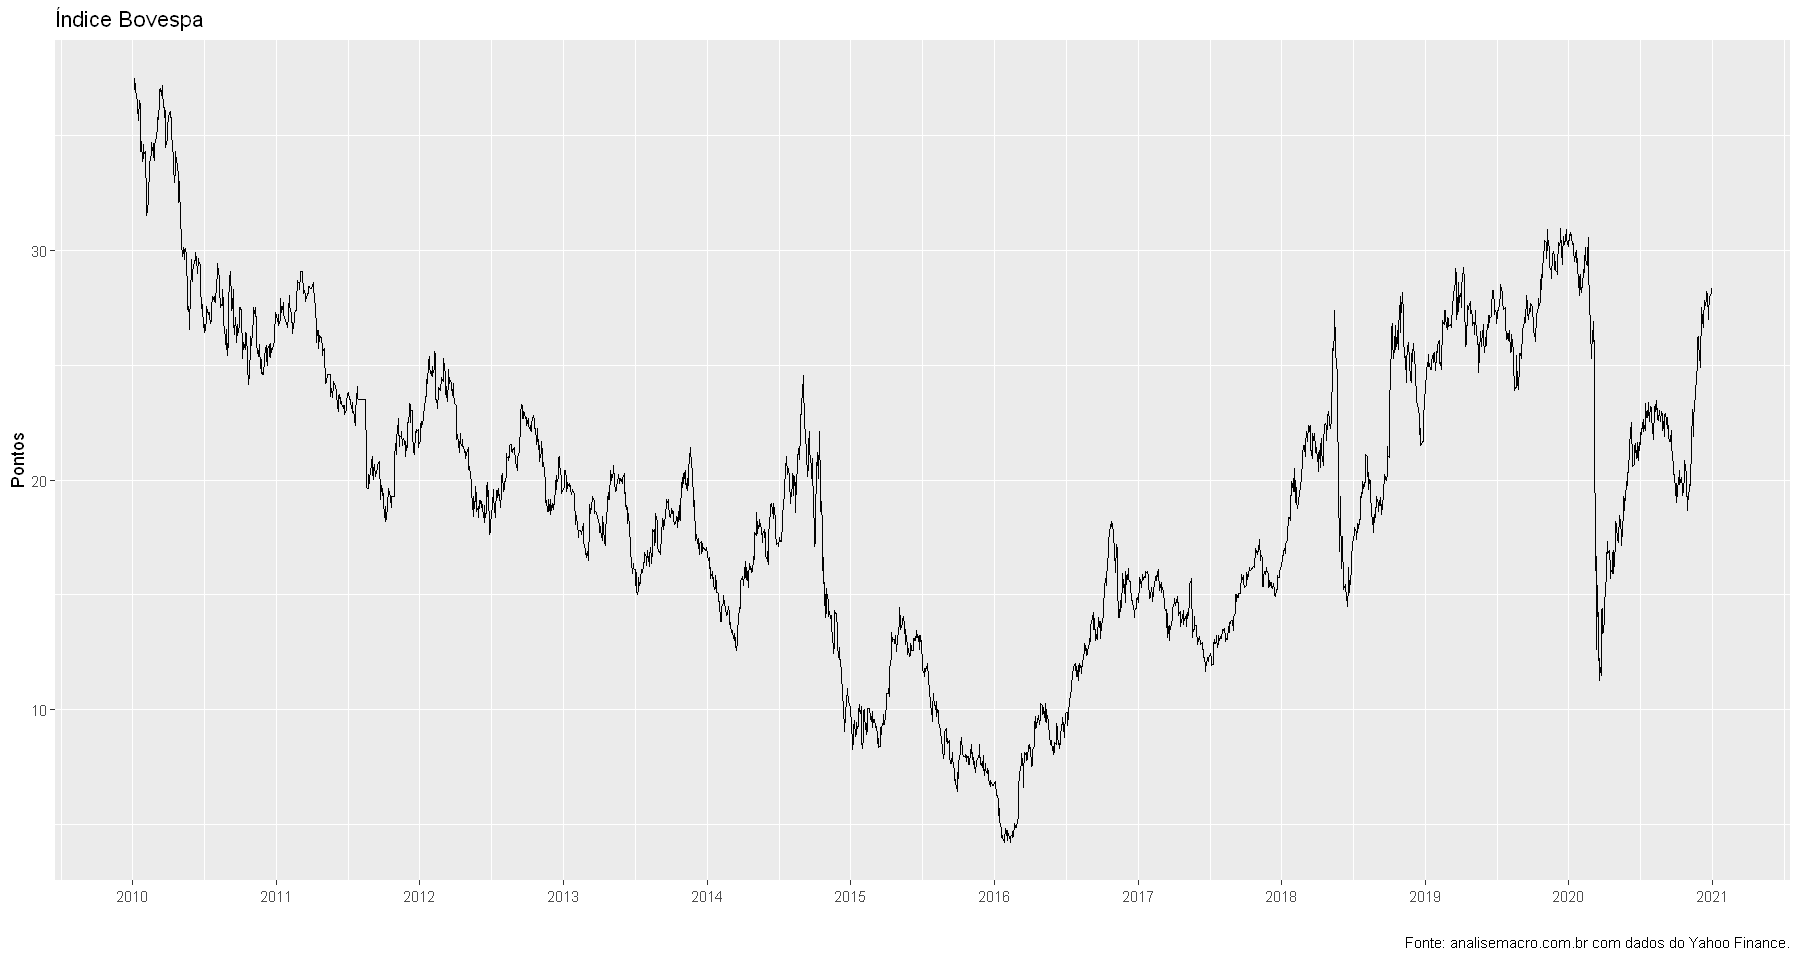

In [5]:
options(repr.plot.width = 15, repr.plot.height = 8)
ggplot(petr$df.tickers, aes(x = ref.date, y = price.close))+
 geom_line()+
 scale_x_date(breaks = date_breaks("1 years"),
 labels = date_format("%Y"))+
 xlab('')+ylab('Pontos')+
 labs(title='Índice Bovespa',
 caption='Fonte: analisemacro.com.br com dados do Yahoo Finance.')

In [274]:
df = petr$df.tickers
df

price.open,price.high,price.low,price.close,volume,price.adjusted,ref.date,ticker,ret.adjusted.prices,ret.closing.prices
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<date>,<chr>,<dbl>,<dbl>
36.95,37.32,36.82,37.32,13303600,28.14226,2010-01-04,PETR4.SA,NA,NA
37.38,37.43,36.80,37.00,21396400,27.90097,2010-01-05,PETR4.SA,-0.008574079,-0.008574491
36.80,37.50,36.80,37.50,18720600,28.27800,2010-01-06,PETR4.SA,0.013513187,0.013513514
37.27,37.45,37.07,37.15,10964600,28.01407,2010-01-07,PETR4.SA,-0.009333333,-0.009333280
37.16,37.39,36.86,36.95,14624200,27.86326,2010-01-08,PETR4.SA,-0.005383580,-0.005383607
37.21,37.34,36.62,36.83,15317700,27.77276,2010-01-11,PETR4.SA,-0.003247790,-0.003247605
36.59,36.68,36.04,36.36,14886200,27.41835,2010-01-12,PETR4.SA,-0.012761136,-0.012761362
36.56,36.74,35.84,36.30,23228200,27.37310,2010-01-13,PETR4.SA,-0.001650209,-0.001650220
36.28,36.46,35.56,35.67,20073400,26.89803,2010-01-14,PETR4.SA,-0.017355540,-0.017355400


In [226]:
class(df)

[1] "data.frame"

In [275]:
df = df %>%
    select(ref.date, price.close) %>% 
    setNames(c("data", "preco"))

In [276]:
df

data,preco
<date>,<dbl>
2010-01-04,37.32
2010-01-05,37.00
2010-01-06,37.50
2010-01-07,37.15
2010-01-08,36.95
2010-01-11,36.83
2010-01-12,36.36
2010-01-13,36.30
2010-01-14,35.67


In [277]:
df$mes = month(df$data, label = TRUE)
df$ano = year(df$data)

In [265]:
df$data = NULL


In [278]:
df$data = format(df$data,"%m/%Y")
df

data,preco,mes,ano
<chr>,<dbl>,<ord>,<dbl>
01/2010,37.32,jan,2010
01/2010,37.00,jan,2010
01/2010,37.50,jan,2010
01/2010,37.15,jan,2010
01/2010,36.95,jan,2010
01/2010,36.83,jan,2010
01/2010,36.36,jan,2010
01/2010,36.30,jan,2010
01/2010,35.67,jan,2010


In [279]:
df = group_by(df,data,ano)%>%summarise(preco=mean(preco))
df

`summarise()` has grouped output by 'data'. You can override using the `.groups` argument.



data,ano,preco
<chr>,<dbl>,<dbl>
01/2010,2010,35.846316
01/2011,2011,27.155000
01/2012,2012,23.584762
01/2013,2013,19.573810
01/2014,2014,15.626818
01/2015,2015,9.230476
01/2016,2016,5.328421
01/2017,2017,15.598095
01/2018,2018,18.019091


In [282]:
df = df %>% 
  arrange(ano)

In [283]:
df

data,ano,preco
<chr>,<dbl>,<dbl>
01/2010,2010,35.84632
02/2010,2010,33.61667
03/2010,2010,35.94957
04/2010,2010,34.16950
05/2010,2010,29.05095
06/2010,2010,28.83238
07/2010,2010,27.36714
08/2010,2010,27.50500
09/2010,2010,27.15238


In [284]:
df$ano=NULL

In [285]:
df

data,preco
<chr>,<dbl>
01/2010,35.84632
02/2010,33.61667
03/2010,35.94957
04/2010,34.16950
05/2010,29.05095
06/2010,28.83238
07/2010,27.36714
08/2010,27.50500
09/2010,27.15238


In [287]:
petro <- ts(df[, 2], start = c(2010, 1), frequency = 12)

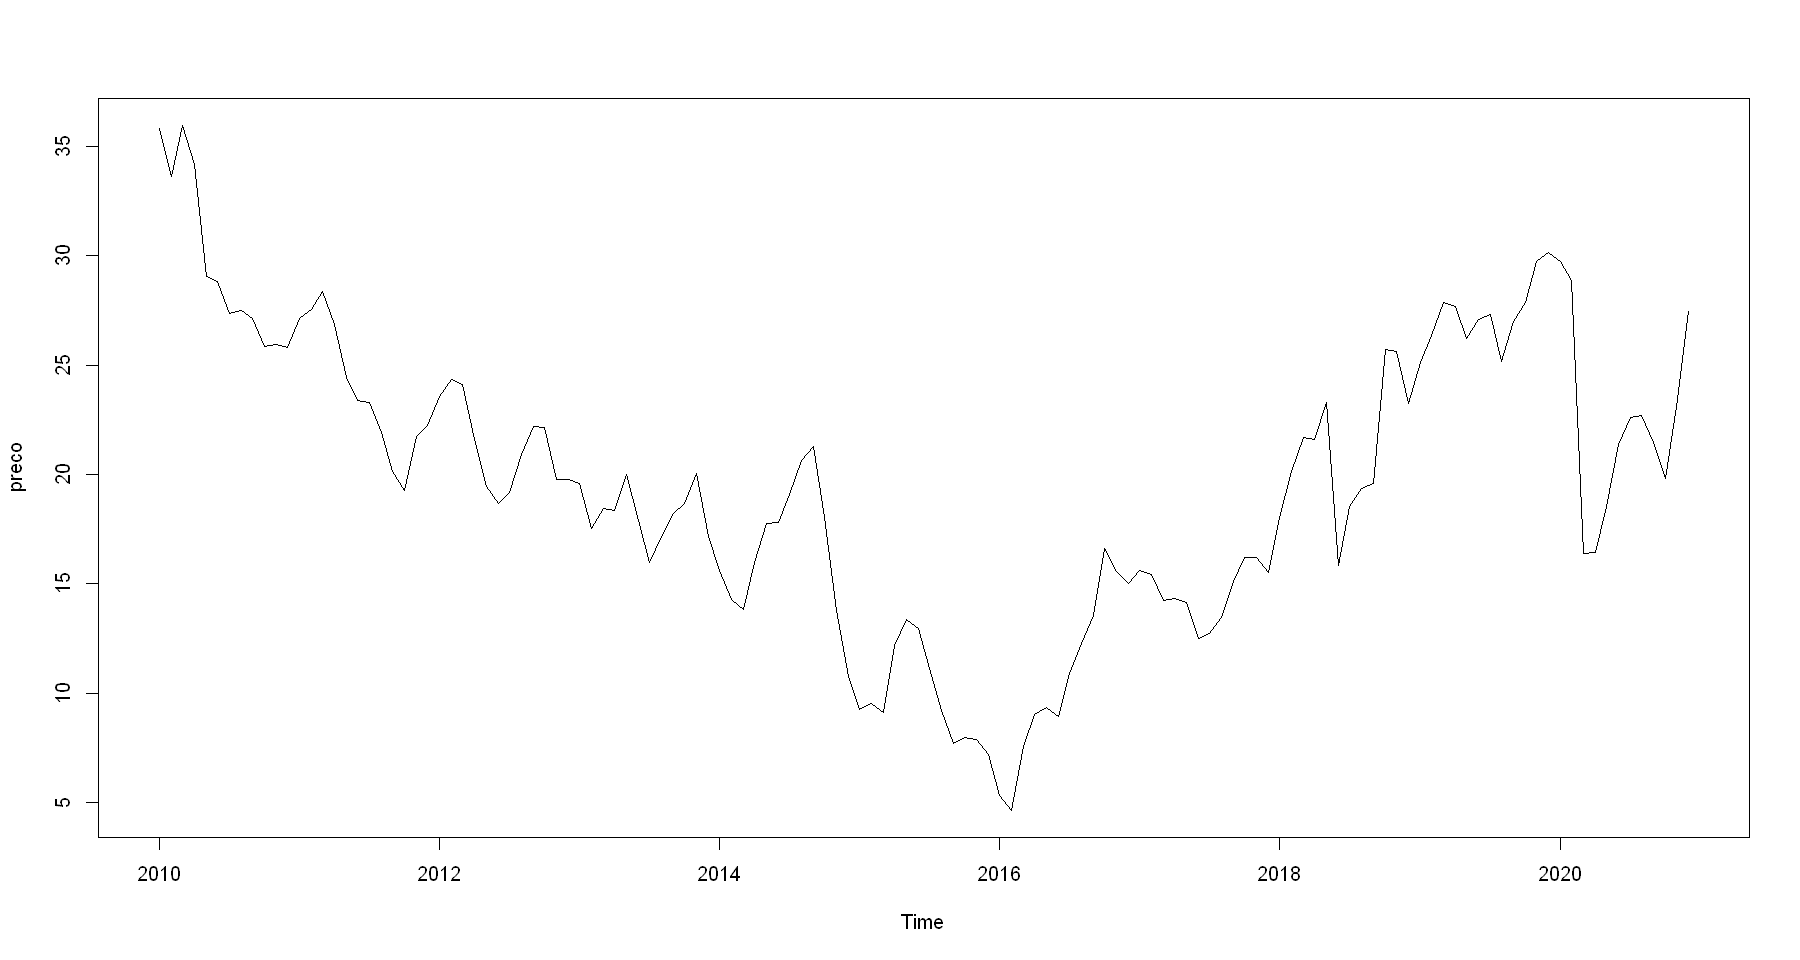

In [289]:
plot(petro)

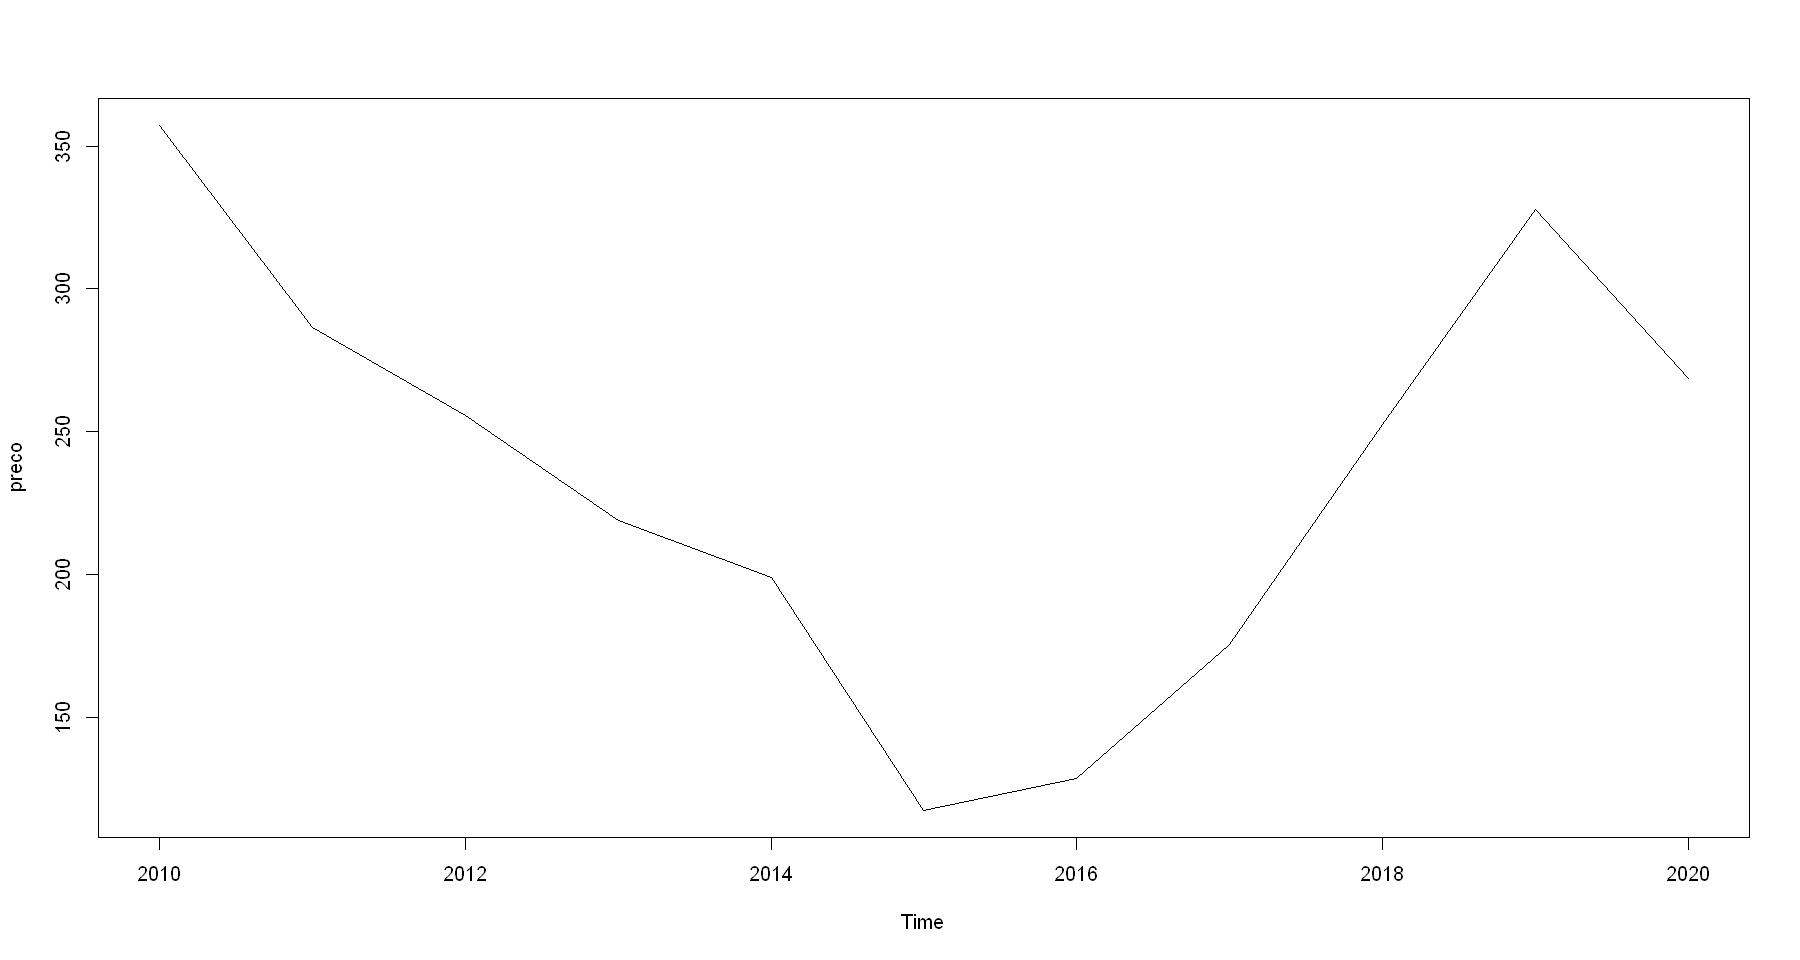

In [291]:
plot(aggregate(petro))

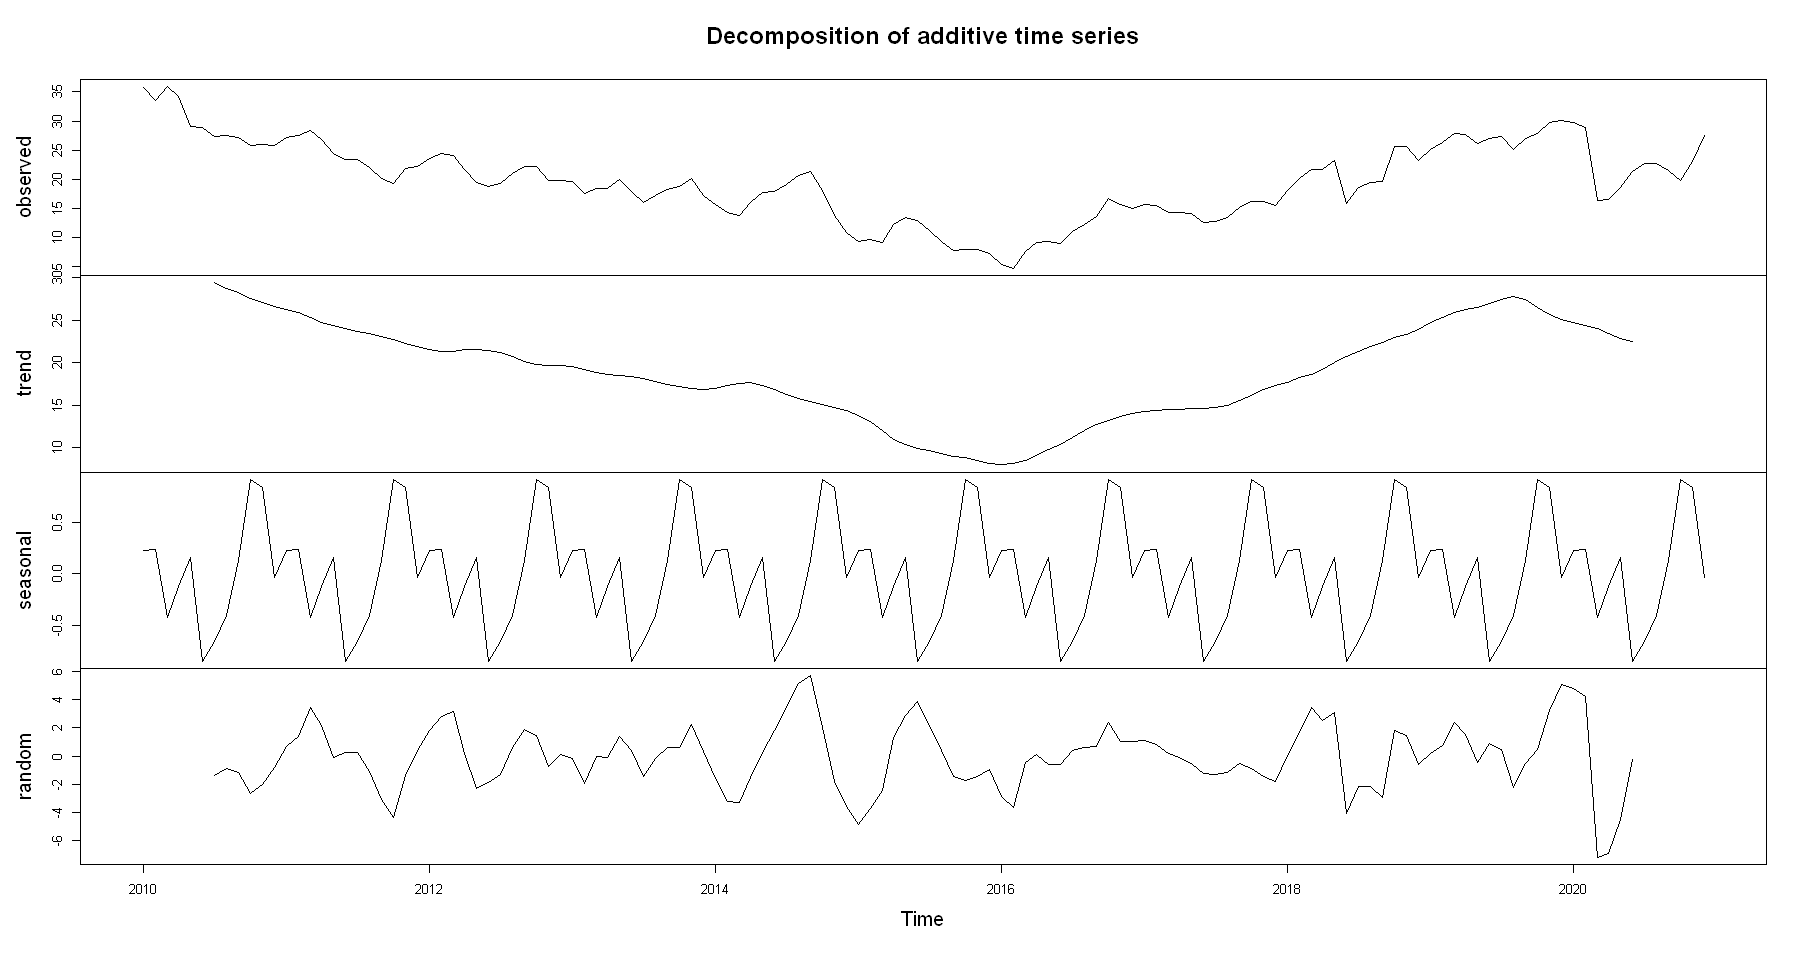

In [292]:
petro %>% decompose %>% plot

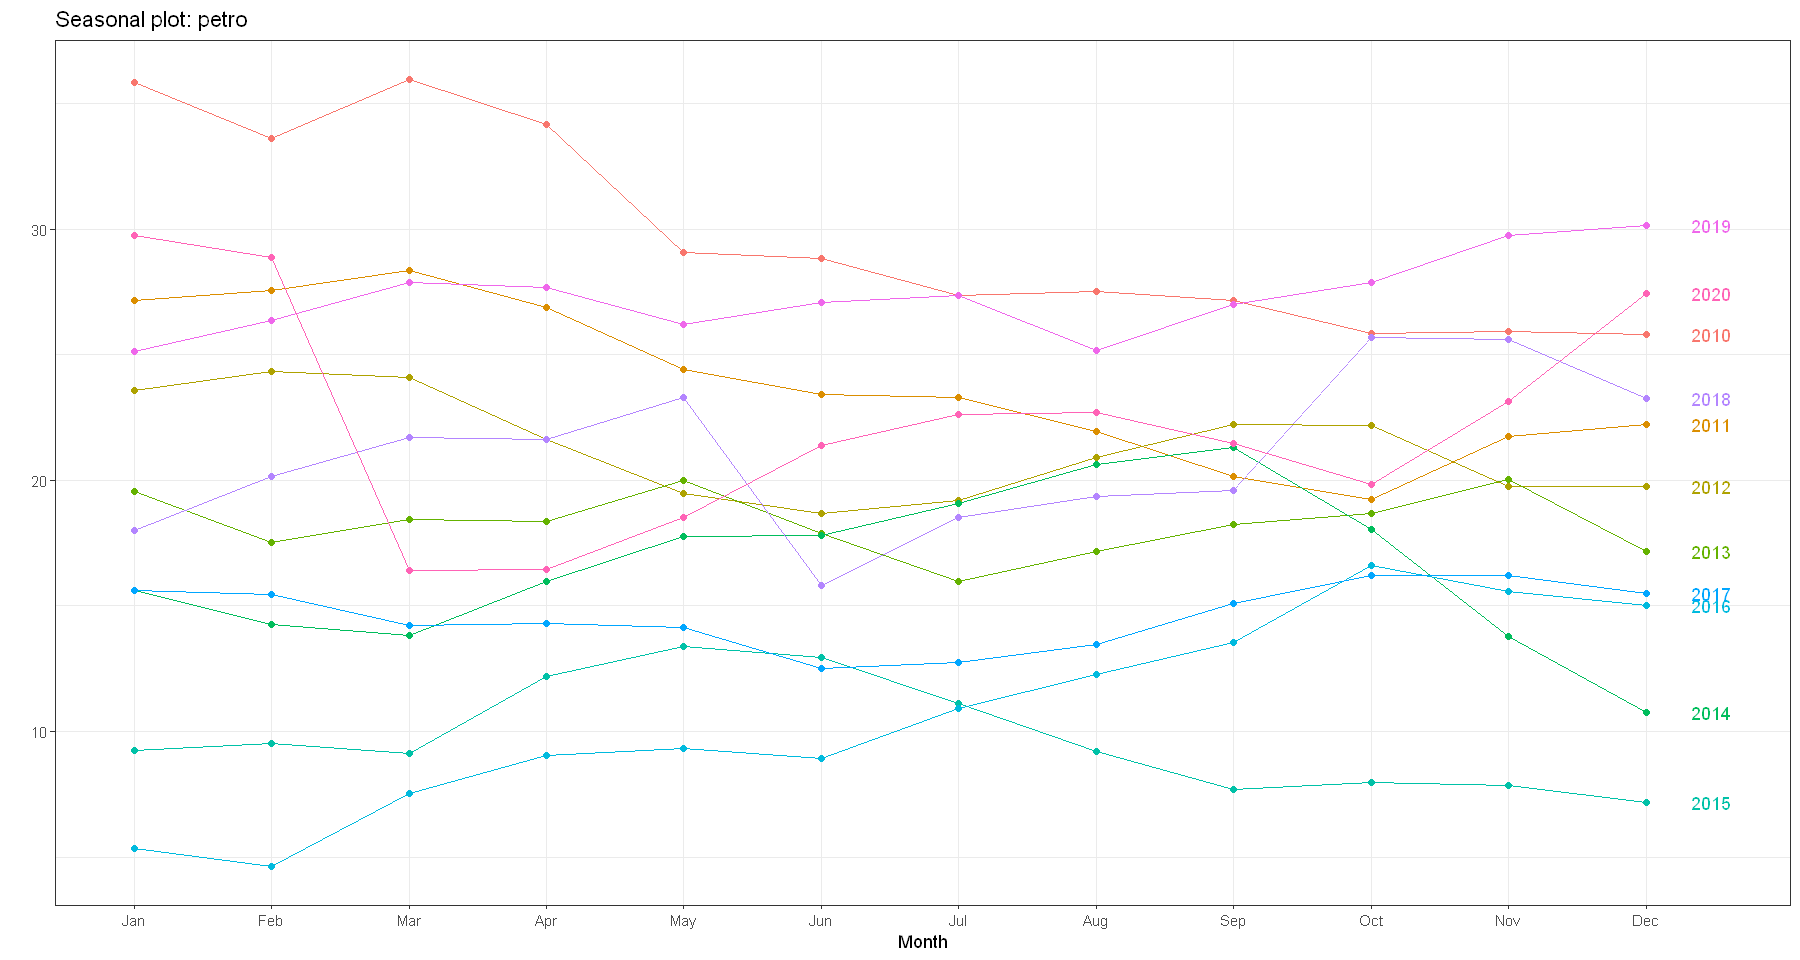

In [293]:
ggseasonplot(petro, year.labels = TRUE) + geom_point() + theme_bw()

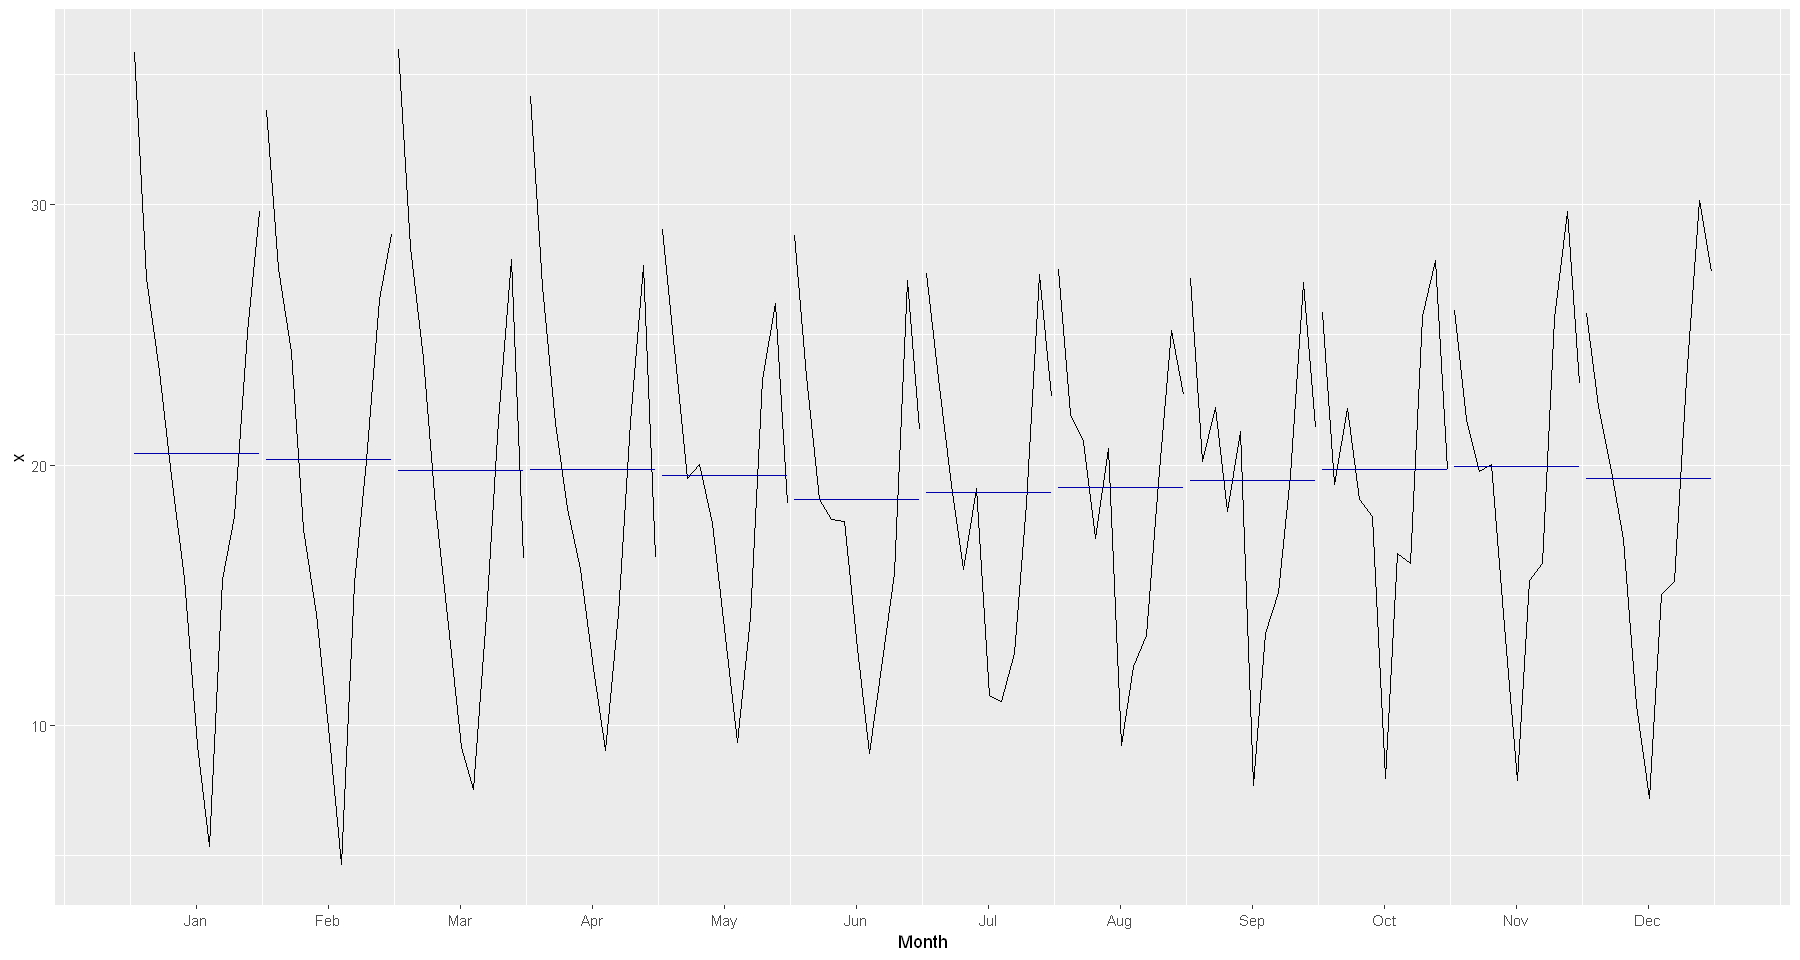

In [294]:
ggmonthplot(petro)

In [295]:
arima = auto.arima(petro)
arima

Series: petro 
ARIMA(0,1,0) 

sigma^2 estimated as 4.512:  log likelihood=-284.57
AIC=571.15   AICc=571.18   BIC=574.02

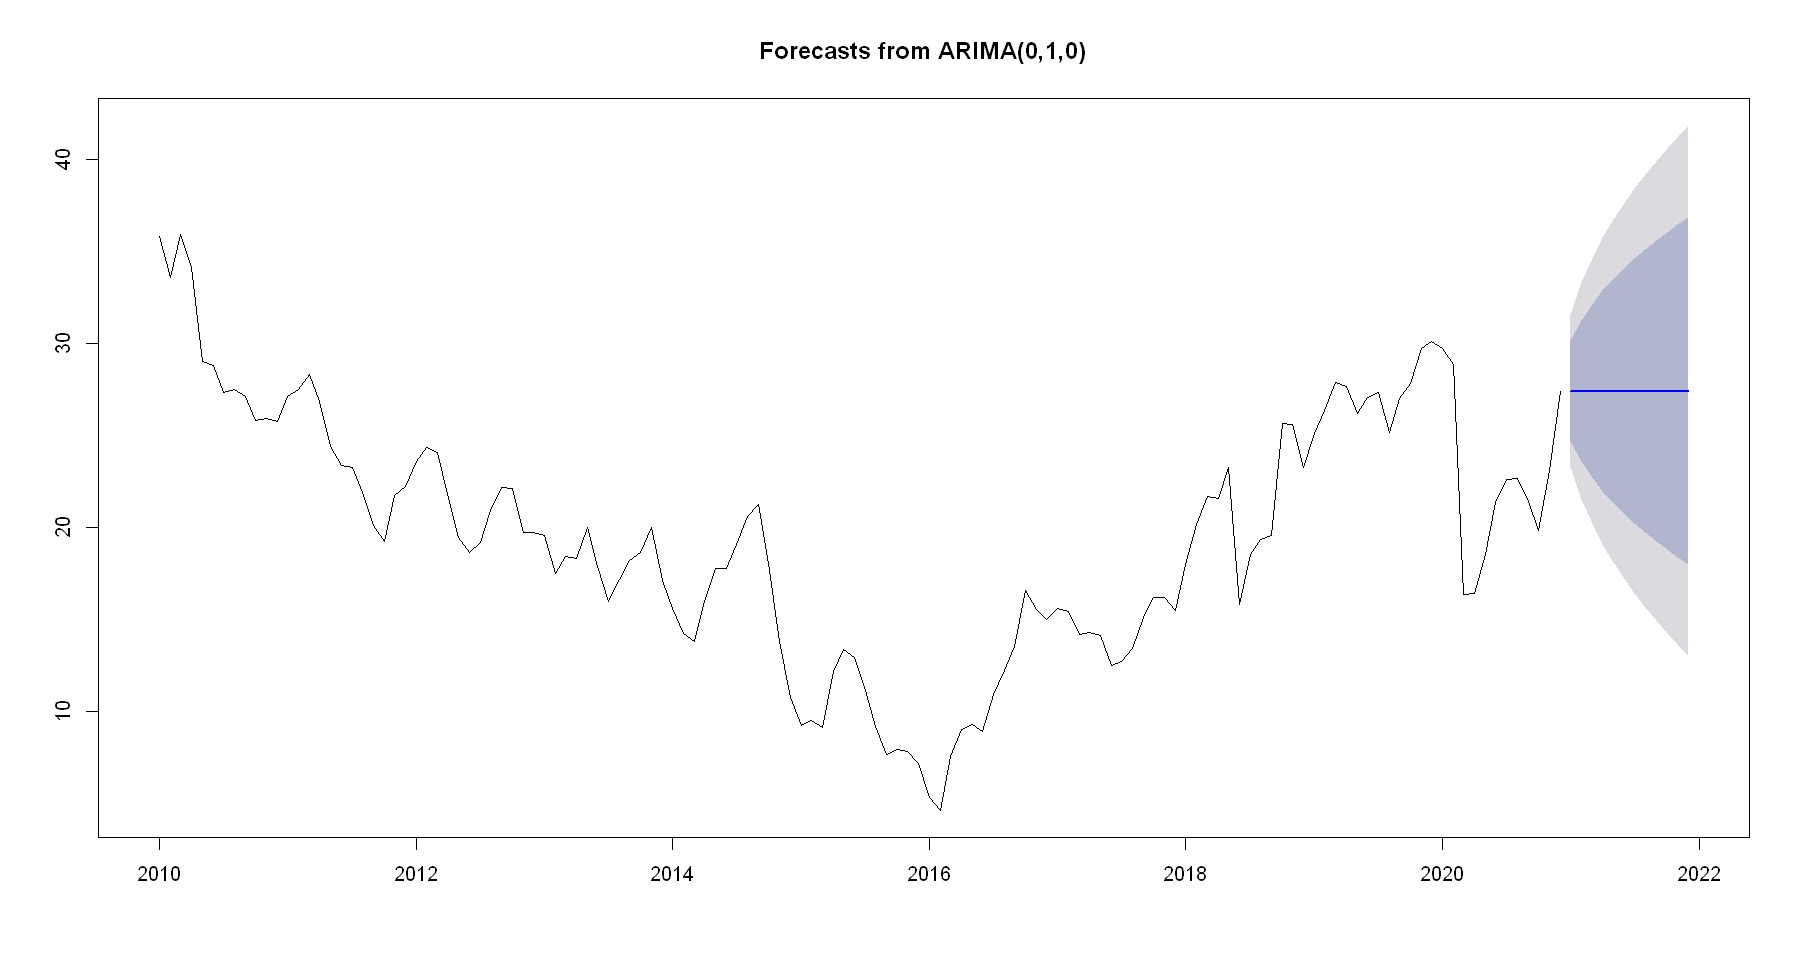

In [296]:
predict = forecast(arima, h=12)
plot(predict)